<div style="text-align: left; background-color:yellow; font-family: Trebuchet MS; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 98px;border-style: solid;border-color: black solid;"> Amazon Top Bestselling Books</div>

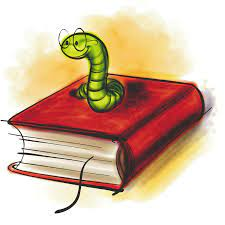

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:yellow;font-family:sans-serif;color:black;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATASET](#2)
  
* [3. EXPLORATORY SOME INFORMATION ABOUT DATASET](#3)
     
* [4. PREPROCESSING DATASET](#4)

* [5. DATA VISUALIZATION](#5)

* [6. AUTHOR MESSAGE](#6)
 

<a id="1"></a>
## <b>1 <span style='color:yellow'>||</span> IMPORTING LIBRARIES</b>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from matplotlib import colors 


<a id="2"></a>
## <b>2 <span style='color:yellow'>||</span> LOADING DATASET</b>

In [ ]:
df=pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
df.head()

<a id="3"></a>
## <b>3 <span style='color:yellow'>||</span>EXPLORATORY SOME INFORMATION ABOUT DATASET</b>

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

<a id="4"></a>
## <b>4 <span style='color:YELLOW'>||</span> PREPROCESSING DATASET</b>

In [ ]:
df.rename(columns={"User Rating":"User_Rating"},inplace=True)

In [ ]:
df.head()

In [ ]:
df.Name.value_counts()

In [ ]:
df.User_Rating.value_counts()

In [ ]:
df.Reviews.value_counts()

In [ ]:
df.Price.value_counts()

In [ ]:
df.Year.value_counts()

In [ ]:
df.Genre.value_counts()

<a id="5"></a>
## <b>5 <span style='color:YELLOW'>||</span> DATA VISUALIZATION</b>

In [ ]:
#df.Genre.hist()
sns.countplot(
    data=df, x =df['Genre']

)
plt.show()


In [ ]:
us_series_data=df[df['Genre']=='Non Fiction']
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_Rating'],fill_color='Magenta'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['User_Rating']],fill_color='thistle'))
                     ])
fig.show()


In [ ]:
us_series_data=df[df['Genre']=='Fiction']
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_Rating'],fill_color='light gray'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['User_Rating']],fill_color='light blue'))
                     ])
fig.show()


In [ ]:
dfd1 = df[df['Author']== 'Jeff Kinney']
dfd2 = df[df['Author']== 'Gary Chapman']
dfd3 = df[df['Author']== 'Rick Riordan']
dfd4 = df[df['Author']== 'Suzanne Collins']

redf1 = dfd1["Genre"].value_counts()[:10].reset_index()
redf2 = dfd2['Genre'].value_counts()[:10].reset_index()
redf3 = dfd3['Genre'].value_counts()[:10].reset_index()
redf4 = dfd4['Genre'].value_counts()[:10].reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["index"],
                     y = redf1["Genre"],
                     marker = dict(color = 'yellow'),
                     name = 'Jeff Kinneyt'))

fig.add_trace(go.Bar(x = redf2['index'],
                     y = redf2['Genre'],
                     name = 'Gary Chapman',
                     marker = dict(color = 'blue')))

fig.add_trace(go.Bar(x = redf3['index'],
                     y = redf3['Genre'],
                     name = 'Rick Riordan',
                     marker = dict(color = 'green')))

fig.add_trace(go.Bar(x = redf4['index'],
                     y = redf4['Genre'],
                     name = 'Suzanne Collins',
                     marker = dict(color = 'magenta')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            direction="down", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.13, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True,True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Jeff Kinney", 
                     method="update", 
                     args=[ {"visible": [True, False, False,False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Gary Chapman', 
                     method="update", 
                     args=[ {"visible": [False, True, False,False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Rick Riordan', 
                     method="update", 
                     args=[ {"visible": [False, False, True,False]}, 
                            {'showlegend' : True} 
                        ]),  
                dict(label='Suzanne Collins', 
                     method="update", 
                     args=[ {"visible": [False, False,False,True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=2, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'Cyan'))])

fig.update_layout(title ="Author and Genre",
                  title_x = 0.5,
                  title_font = dict(size = 30, color = 'Cyan'))

fig.show()

In [ ]:
dfp = df['User_Rating'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['Price'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['Year'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['User_Rating'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'User_Rating',
                     marker = dict(color = 'purple')))

fig.add_trace(go.Bar(x = dfl['Price'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Price',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['Year'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Year',
                     marker = dict(color = 'pink')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 

                dict(label="User_Rating", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Price', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Year', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="EDA_Amazon_Top_Bestselling_Books(User_Rating,Price,Reviews)",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

# Which author has the most books?

In [ ]:
#color_list=  ['DarkBlue','Teal','LightBlue','black','pink','Orange','red','blue','purple']

#colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (10,10)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 1200 ,
                       max_words = 120).generate(" ".join(df['Author']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
g=sns.pairplot(
    df,
    x_vars=["User_Rating", "Reviews", "Price"],
    y_vars=["Year"],    plot_kws=dict(marker="+", linewidth=1),
    palette="ocean", hue="Genre"
)
g.fig.set_size_inches(15,15)
plt.show()

<a id="3.1"></a>
#### <b>3.1 <span style='color:cyan'>|</span> Which authors have the most books between 2009-2019?

In [ ]:
df.Author.value_counts()

In [ ]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['Author'] ,palette='PuBu',order=df['Author'].value_counts().index[0:50])
plt.show()

<a id="3.2"></a>
#### <b>3.2 <span style='color:cyan'>|</span> Which are the top rated books?

In [ ]:
p=df.Name[df.User_Rating==4.9]
p

In [ ]:
a=df.sort_values(by="User_Rating",ascending=False) #viewCount goes from highest to lowest.
a

In [ ]:
a.Name.value_counts()

In [ ]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = a , x =a['Name'] ,palette='PuBu',order=a['Name'].value_counts().index[0:10])
plt.show()

# In this countplot, the name and number of the first 10 books in the rating order are given.

In [ ]:
oldest_us_series=df.sort_values(by='User_Rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'User_Rating'],fill_color='cyan'),
                 cells=dict(values=[oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='light blue'))
                     ])
fig.show()


In [ ]:
df.Year.hist()

In [ ]:
df.head()

# What are the most visited books?

In [ ]:
oldest_us_series=df.sort_values(by='Reviews',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'Reviews'],fill_color='lightsalmon'),
                 cells=dict(values=[oldest_us_series['Name'],oldest_us_series['Reviews']],fill_color='light blue'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2009

In [ ]:
us_series_data=df[df['Year']==2009]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2010

In [ ]:
us_series_data=df[df['Year']==2010]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2011

In [ ]:
us_series_data=df[df['Year']==2011]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2012

In [ ]:
us_series_data=df[df['Year']==2012]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2013

In [ ]:
us_series_data=df[df['Year']==2013]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2014

In [ ]:
us_series_data=df[df['Year']==2014]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2015

In [ ]:
us_series_data=df[df['Year']==2015]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2016

In [ ]:
us_series_data=df[df['Year']==2016]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2017

In [ ]:
us_series_data=df[df['Year']==2017]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2018

In [ ]:
us_series_data=df[df['Year']==2018]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2019

In [ ]:
us_series_data=df[df['Year']==2019]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<a id="6"></a>
## <b>6 <span style='color:YELLOW'>||</span> AUTHOR MESSAGE</b>

<p style="background-color:yellow;font-family:newtimeroman;color:#1D3E06;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> ✨Best Wishes✨</p>